## Lake Zug VMP (25-26/11/2025)

In [22]:
# imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Lake Zug bathymetry
bathy = xr.open_dataset('../../../../data/lake_zug/bathymetry/zugersee_bathy.nc')

In [33]:
# mooring locations
mooring_locs = pd.DataFrame({
    'loc': ['LZC', 'LZE', 'LZW', 'LZN', 'LZ1'],
    'xsc': [2680084, 2680314, 2679912, 2679436, 2680385],
    'ysc': [1218840, 1218883, 1218770, 1219384, 1216792]
})

mooring_locs

,loc,xsc,ysc
0,LZC,2680084,1218840
1,LZE,2680314,1218883
2,LZW,2679912,1218770
3,LZN,2679436,1219384
4,LZ1,2680385,1216792


In [34]:
# ctd locations
ctd_locs = pd.DataFrame({
    'loc': [f'P{x}' for x in range(1, 13)],
    'xsc': [679803, 679803, 679663, 679415, 679505, 680030, 680150, 680223, 680409, 680814, 681350, 681909],
    'ysc': [224100, 222690, 221650, 220433, 219544, 218872, 218462, 218126, 217437, 216239, 214957, 213760]
})

ctd_locs['xsc'] += int(2e6)
ctd_locs['ysc'] += int(1e6)

ctd_locs

,loc,xsc,ysc
0,P1,2679803,1224100
1,P2,2679803,1222690
2,P3,2679663,1221650
3,P4,2679415,1220433
4,P5,2679505,1219544
5,P6,2680030,1218872
6,P7,2680150,1218462
7,P8,2680223,1218126
8,P9,2680409,1217437
9,P10,2680814,1216239


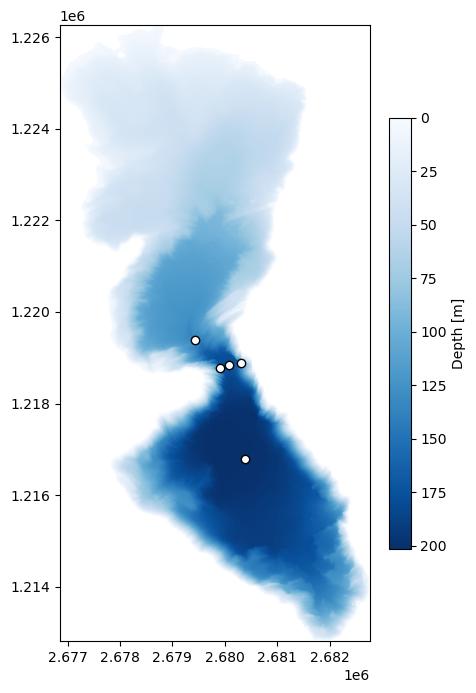

In [35]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    ax.scatter(row.xsc, row.ysc, c='white', edgecolor='black')

plt.show()

In [36]:
vmp_day2 = [1216792 + 500*x for x in range(10)]

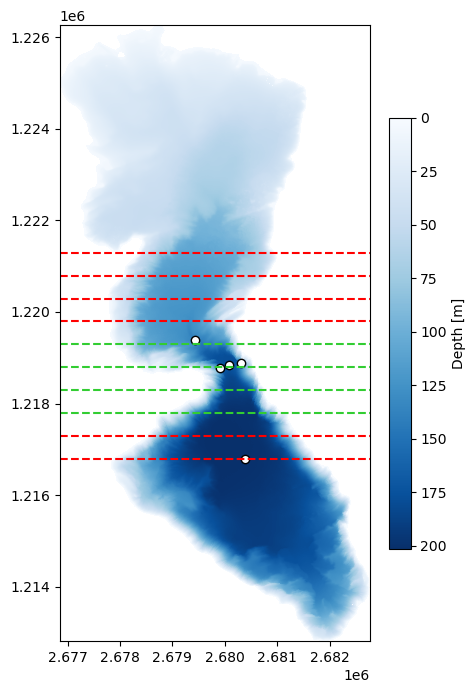

In [45]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Blues', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    ax.scatter(row.xsc, row.ysc, c='white', edgecolor='black')

for i, x in enumerate(vmp_day2):
    if i >= 2 and i <= 5:
        color = 'limegreen'
    else:
        color = 'red'
    ax.axhline(x, color=color, ls='--')

plt.show()